In [1]:

import pandas as pd
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


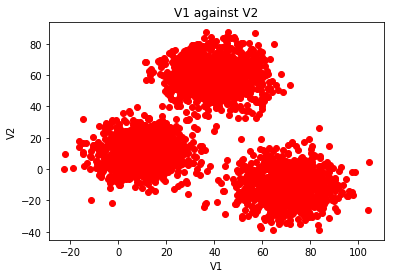

In [4]:
#scatter plot of the two variables
V1 = data['V1']
V2 = data['V2']
plt.scatter(V1, V2,  color='r')
plt.rcParams['figure.figsize'] = (16, 9)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('V1 against V2')
plt.show()

In [5]:
#value of k = 3

#array of clusters
clusters = []
WSS = []
K = range(1,11)

In [6]:
for i in K:
    kmeans = KMeans(n_clusters=i).fit(data)
    clusters.append(kmeans.cluster_centers_)
    WSS.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

In [7]:
WSS

[39.52434767194924,
 24.92664428548198,
 12.670900904711122,
 11.785350550598892,
 11.006601160676162,
 10.26089195825849,
 9.516506888993929,
 8.96486884339486,
 8.400886597388753,
 8.097102480447884]

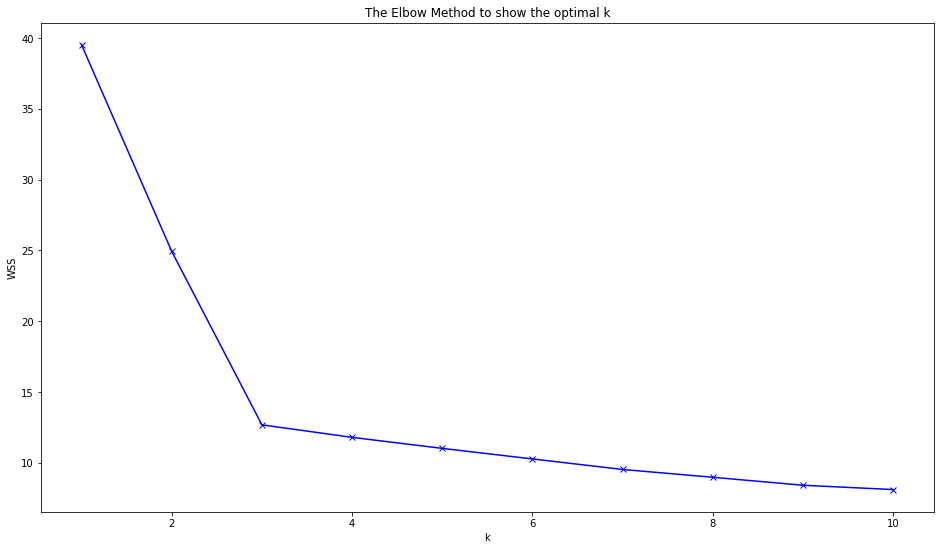

In [8]:
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method to show the optimal k')
plt.show()

In [9]:
#the most suitable value for k using the elbow method = 3

In [10]:
kmodel = KMeans(n_clusters=3).fit(data)

In [11]:
pred = kmodel.predict(data)

In [12]:
kmodel.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [13]:
centroids = kmodel.cluster_centers_
centroids

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

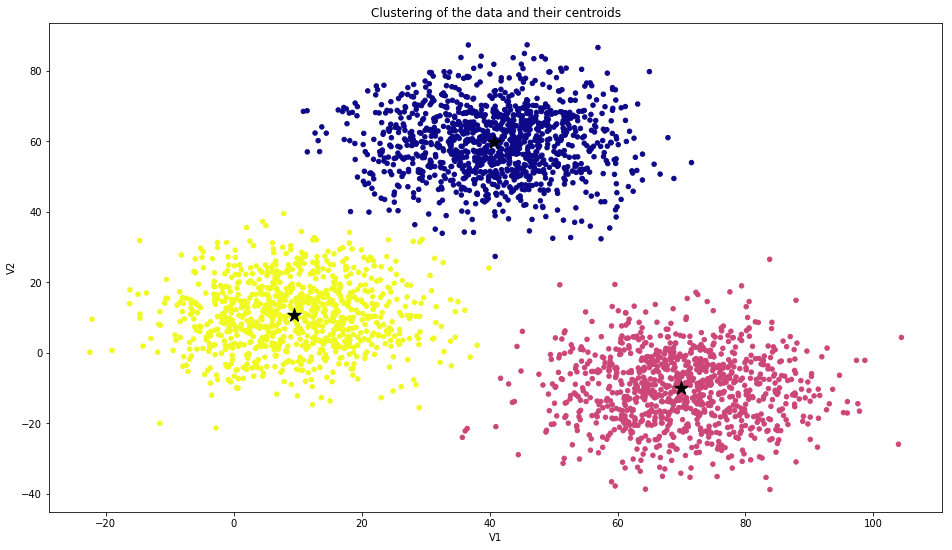

In [14]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.scatter(data['V1'], data['V2'], c=pred, s=20, cmap='plasma')
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='*', s=200)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Clustering of the data and their centroids')
plt.show()